# The QR factorization for least-squares problems

Instead of doing the Housholder transformations, it is fastest to consider the blocks and compute the QR fact with the Givens rotations. 

We will be given a code in C for computing the Givens rotation for the QR factorization. Householder and Givens have the same order but are more stable. The Gram-Schmidt is fastest but less stable. 



## Least-squares problem

If $x$ solves the LS problem:
- $A^T (Ax - b) =0 $ solving the normal equations
- If $x$ and $x + \alpha b$ solves the problem, then $z \in Ker(A)$. But if $rk(A) = n$ then $Ker(A) = \{0\}$ and then there exists a unique solution of the LS problem.

When $rk(A) = n$ the approach is different and therefore we may need to consider both cases and code according to this condition (consider both situations when coding). We may have to check whether the matrix is full ranked and smthg else !! 

Given the normal equations, note that the condition number has the order of $A^2$.

We have to code the corresponding algorithm to colve full-rank LS problem. Applied to $(x_i, y_i) \in \mathbb{R}^2, \ 1 \leq i \leq n$ we fit a polynomial $p_m(x) = a_0 + a_1 x+ a_2 x^2 + \cdots + a_m x^m$, i.e. $p_m(x_i)=y_i$, then we have the matritial system:
$$
\begin{pmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^m \\
1 & x_1 & x_1^2 & \cdots & x_1^m \\
\vdots & \vdots & \vdots & \cdots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^m 
\end{pmatrix}
\begin{pmatrix}
a_0 \\ a_1 \\ \vdots \\ a_n 
\end{pmatrix}=
\begin{pmatrix}
y_0 \\ y_1 \\ \vdots \\ y_n 
\end{pmatrix}
$$
We ay need to use the datafile present on the Campus Virtual. 

## 04/11/22

We can see the effect of overfitting. By zooming we can see the range of degree in which we donnot have overfitting. (12 to 16 more or less). 

## QR factorization using Givens in C:

We have the QR factorization: $A=QR$ with numpy.qr or scipy.qr (qr-householder)

We can find this factorization by 
- Gram- Schmidt
- Householder 
- Givens

Givens is a rotation that trasforms into zero one coefficient per step. It is slower in general than Householder. However if we have numerable zeros, then the Givens rotation is fastest than Householder. 

We will see a code that performs QR factorization algorithm using Givens in C, and adapt it so we can use it on Python. 

Codes available on the CV, try to compile it!!!!

--------

## The rank deficient LS problem using QR

Consider the optimization problem $min \ || Ax-b||_2^2$, $A \in \mathbb{R}^{m\times n}, b \in \mathbb{R}^m, m\geq n$, with $r:=rank(A) <n$. Otherways, we can apply the aforementioned algorithm. Consider the following procedure:
1. RK appears in many applications (close to be rank deficient). If $rank(A)< n$, then considering the QR factorization we have $A=QR$ ill-conditioned. Sometimes it is best to solve the problem as if it was rank-deficient, even if it is not. 
2. There exsits an inifite number of solutions. So, there is freedom on the choice of the solution. Maybe we choose the solution that has minimum norm. From a numerical point of view, having freedom is something we can take advantage of. We have then $n-r$ dimensional vector space of solutions. 
3. We can look for the solution such that $||x||_2$ is minimum, by considering the SVD. 

To apply the QR factorization to solve the LS rank-deficient porblem one needs column pivoting. Let's consider $AP=QR$, $A \in \mathbb{R}^{m\times n}, R \in \mathbb{R}^{m\times n}, Q \in \mathbb{R}^{m\times m}$, $rank(A) =r<n$, then we have the block matrix
$$
R = \begin{pmatrix}
R_1 & S \\ 0 & 0
\end{pmatrix}
$$
with $R_1 \in \mathbb{R}^{r\times r}$ being a non-singular and upper triangular matrix. 

This computaiton is much faster. 

So going back to our minimization problem, note that we want to minimize the norm. So let's apply the QR factorization conducted $AP = QR \iff A = QRP^T$:
$$
|| b - Ax||_2^2 = || b - Q \begin{pmatrix}
R_1 & S \\ 0 & 0
\end{pmatrix} P^Tx ||_2^2
$$

Consider the decomposition of the vector $P^T x = (u,v)^T$, where $u \in \mathbb{R}^r, v \in \mathbb{R}^{n-r}$, so recalling that $Q$ is orthogonal, we have:
$$
|| b - Ax||_2^2 = || b - Q \begin{pmatrix}
R_1 & S \\ 0 & 0
\end{pmatrix} 
|| b - Ax||_2^2 = \Big|\Big| Q^Tb - \begin{pmatrix}
u \\ v
\end{pmatrix}  \Big| \Big|_2^2
$$
now by considering $Q=(c,d)^T$ we obtain:
$$
|| b - Ax||_2^2 = || b - Q \begin{pmatrix}
R_1 & S \\ 0 & 0
\end{pmatrix} 
|| b - Ax||_2^2 = \Big|\Big| \begin{pmatrix}
c- R_1 u - Sv \\ d
\end{pmatrix}  \Big| \Big|_2^2 = \underbrace{|| c - R_1 u - Sv ||_2^2}_{=0} + \underbrace{||d||_2^2}_{error}
$$

Since we consider (u,v) such that the first condition holds. Thus, we have that $min ||b-Ax||_2^2 = ||d||_2^2$ provided by the conditions: $R_1 u + Sv = c$ given considering the strategy:
- $v = 0 \Rightarrow R_1 u = c$
- $(u,v)$ such that $||(u,v)||_2^2$ is minimum by considering the SVD.

We have to code that since it is not full rank.

In [16]:
import pandas as pd
data1 = pd.read_csv('dades_regressio.csv', header = None)

In [17]:
data1

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,0.010101,0.000102,0.000001,1.041020e-08,1.051536e-10,1.062157e-12,1.072886e-14,1.083723e-16,1.094670e-18,-0.184704
1,1.0,1.0,0.878788,0.772268,0.678660,5.963981e-01,5.241074e-01,4.605792e-01,4.047514e-01,3.556907e-01,3.125766e-01,0.189993
2,1.0,1.0,0.292929,0.085808,0.025136,7.362939e-03,2.156821e-03,6.317959e-04,1.850715e-04,5.421287e-05,1.588054e-05,-1.499201
3,1.0,1.0,0.373737,0.139680,0.052203,1.951040e-02,7.291765e-03,2.725205e-03,1.018511e-03,3.806556e-04,1.422652e-04,-2.039879
4,1.0,1.0,0.010101,0.000102,0.000001,1.041020e-08,1.051536e-10,1.062157e-12,1.072886e-14,1.083723e-16,1.094670e-18,1.054536
5,1.0,1.0,0.636364,0.404959,0.257701,1.639915e-01,1.043582e-01,6.640979e-02,4.226078e-02,2.689322e-02,1.711387e-02,1.265286
6,1.0,1.0,0.595960,0.355168,0.211666,1.261442e-01,7.517684e-02,4.480236e-02,2.670040e-02,1.591236e-02,9.483122e-03,0.795917
7,1.0,1.0,0.202020,0.040812,0.008245,1.665633e-03,3.364914e-04,6.797807e-05,1.373294e-05,2.774332e-06,5.604711e-07,-1.138542
8,1.0,1.0,0.323232,0.104479,0.033771,1.091589e-02,3.528368e-03,1.140483e-03,3.686409e-04,1.191566e-04,3.851528e-05,-1.473442
9,1.0,1.0,0.757576,0.573921,0.434789,3.293853e-01,2.495344e-01,1.890412e-01,1.432130e-01,1.084947e-01,8.219296e-02,2.065157


In [18]:
AA =data1.to_numpy()

In [19]:
A = AA[:, :-1]

In [20]:
A

array([[1.00000000e+00, 1.00000000e+00, 1.01010101e-02, 1.02030405e-04,
        1.03061015e-06, 1.04102036e-08, 1.05153571e-10, 1.06215729e-12,
        1.07288615e-14, 1.08372338e-16, 1.09467008e-18],
       [1.00000000e+00, 1.00000000e+00, 8.78787879e-01, 7.72268136e-01,
        6.78659877e-01, 5.96398074e-01, 5.24107398e-01, 4.60579229e-01,
        4.04751443e-01, 3.55690662e-01, 3.12576643e-01],
       [1.00000000e+00, 1.00000000e+00, 2.92929293e-01, 8.58075707e-02,
        2.51355510e-02, 7.36293918e-03, 2.15682057e-03, 6.31795924e-04,
        1.85071533e-04, 5.42128734e-05, 1.58805387e-05],
       [1.00000000e+00, 1.00000000e+00, 3.73737374e-01, 1.39679625e-01,
        5.22034960e-02, 1.95103975e-02, 7.29176473e-03, 2.72520500e-03,
        1.01851096e-03, 3.80655611e-04, 1.42265228e-04],
       [1.00000000e+00, 1.00000000e+00, 1.01010101e-02, 1.02030405e-04,
        1.03061015e-06, 1.04102036e-08, 1.05153571e-10, 1.06215729e-12,
        1.07288615e-14, 1.08372338e-16, 1.09467008e-

In [21]:
b = AA[:,-1]

In [22]:
b

array([-0.18470418,  0.18999289, -1.49920144, -2.03987861,  1.05453576,
        1.26528633,  0.79591724, -1.13854153, -1.47344188,  2.06515672,
       -0.13668538, -0.30923005, -0.40744837, -0.95491781, -0.54638395])

In [23]:
import numpy as np

np.linalg.matrix_rank(A)

10

In [24]:
from scipy import linalg 

Q, R, P = linalg.qr(A, pivoting = True)

In [25]:
P

array([ 0,  2,  6,  3, 10,  4,  8,  5,  9,  7,  1], dtype=int32)

In [26]:
R

array([[-3.87298335e+00, -1.84651327e+00, -5.76515167e-01,
        -1.21493892e+00, -3.09976838e-01, -8.96002429e-01,
        -4.12453055e-01, -7.04846551e-01, -3.56039038e-01,
        -4.83516736e-01, -3.87298335e+00],
       [ 0.00000000e+00, -1.13834395e+00, -7.09899109e-01,
        -1.07770734e+00, -4.21140565e-01, -9.44686863e-01,
        -5.42308167e-01, -8.18140358e-01, -4.77100371e-01,
        -6.18972624e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  4.64168805e-01,
         2.84227668e-01,  3.55948569e-01,  4.13086596e-01,
         4.20038970e-01,  4.59710542e-01,  3.88511635e-01,
         4.47257389e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.07442473e-01, -5.46698416e-02,  8.13347526e-02,
        -4.10110624e-02,  3.65630991e-02, -5.01370813e-02,
        -2.51697950e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.04855189e-02, -1.08303151e-02,
  

In [28]:
r = np.linalg.matrix_rank(R)

In [32]:
R[:r, :]

array([[-3.87298335e+00, -1.84651327e+00, -5.76515167e-01,
        -1.21493892e+00, -3.09976838e-01, -8.96002429e-01,
        -4.12453055e-01, -7.04846551e-01, -3.56039038e-01,
        -4.83516736e-01, -3.87298335e+00],
       [ 0.00000000e+00, -1.13834395e+00, -7.09899109e-01,
        -1.07770734e+00, -4.21140565e-01, -9.44686863e-01,
        -5.42308167e-01, -8.18140358e-01, -4.77100371e-01,
        -6.18972624e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  4.64168805e-01,
         2.84227668e-01,  3.55948569e-01,  4.13086596e-01,
         4.20038970e-01,  4.59710542e-01,  3.88511635e-01,
         4.47257389e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.07442473e-01, -5.46698416e-02,  8.13347526e-02,
        -4.10110624e-02,  3.65630991e-02, -5.01370813e-02,
        -2.51697950e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.04855189e-02, -1.08303151e-02,
  

In [31]:
r

10

In [30]:
R1 = R[:r, :r]

In [31]:
R1

array([[-3.87298335e+00, -1.84651327e+00, -5.76515167e-01,
        -1.21493892e+00, -3.09976838e-01, -8.96002429e-01,
        -4.12453055e-01, -7.04846551e-01, -3.56039038e-01,
        -4.83516736e-01],
       [ 0.00000000e+00, -1.13834395e+00, -7.09899109e-01,
        -1.07770734e+00, -4.21140565e-01, -9.44686863e-01,
        -5.42308167e-01, -8.18140358e-01, -4.77100371e-01,
        -6.18972624e-01],
       [ 0.00000000e+00,  0.00000000e+00,  4.64168805e-01,
         2.84227668e-01,  3.55948569e-01,  4.13086596e-01,
         4.20038970e-01,  4.59710542e-01,  3.88511635e-01,
         4.47257389e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.07442473e-01, -5.46698416e-02,  8.13347526e-02,
        -4.10110624e-02,  3.65630991e-02, -5.01370813e-02,
        -2.51697950e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.04855189e-02, -1.08303151e-02,
         2.35960775e-02, -9.45015105e-03,  3.31953623e-02,
         1.

In [33]:
S = R[:r, r:]

In [34]:
S

array([[-3.87298335],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

In [36]:
cd = np.matmul(Q.T, b)
c = cd[:r]
d = cd[r:]
print(c.shape, d.shape)

(10,) (5,)


In order to find the solution we take the basic solution of the LS problem by setting $v = 0 $ on the linear system $R_1 u + S v = c$, then we have the linear system left $R_1 u = c$, which can be solved since it is full rank $R_1 \in \mathbb{R_1}^{r \times r}$ and rank($R_1$)$=r$, then we could apply the normal equations to solve the full rank LS problem $R_1 u = c$: 
1. Compute $R_1^T R_1$
2. Compute $\alpha = R_1^T c$
3. Compute the Cholesky factorization of $R_1^T R_1 = G G^T$
4. Solve $G y = \alpha$, and $G^T u = y$ to obtain $u_{LS}$
Now we would have the solution $u_{LS}$, and we can therefore compute the value $x_{LS}$ we are looking for from the expression $P^T x = (u, v)^T$. Hence $x = P (u,v)^T$, with $v=0, u_{LS}$ obtained.  

In [44]:
from scipy.linalg import solve_triangular
r = np.linalg.matrix_rank(A)
m = A.shape[0]
n = A.shape[1]

RR = np.matmul(R1.T, R1)
alp = np.matmul(R1.T, c)
chol = np.linalg.cholesky(RR)
## remember G is lower triangular so we have to solve two triangular systems:
y1 = solve_triangular(chol, alp, lower=True, unit_diagonal=False)
y2 = solve_triangular(chol.T, y1, lower=False, unit_diagonal=False) ## this is u
vec = np.zeros((n))
vec[:r]= y2
x_sol = vec[P]
print(x_sol)
print(x_sol.shape)

[ 1.63199964e+01 -1.96312248e+06 -2.63521497e+06  2.94016790e+04
  0.00000000e+00 -2.84031759e+05  1.32440747e+06 -2.08105795e+05
  2.91769625e+06  8.20763715e+05 -1.84921148e+03]
(11,)


QR factorization over this full rank LS problem instead:
1. Compute QR factorization of $R_1 = Q_2 R_2$
2. Write $Q^T c = (y_1, y_2)^T \in \mathbb{R}^m$, with $y_1 \in \mathbb{R}^n$
3. We solve $R_2 u = Q_2^T c \iff R_2^1 u = y_1$ and fix $y_1 = 0 $

In [60]:
Q_2, R_2, P_2 = linalg.qr(R1, pivoting = True)
#print(P_2)
print(R_2.shape)
#print(R_2)
yy = np.matmul(Q_2.T, c) 
print(yy.shape)
u_sol2 = np.linalg.solve(R_2, yy)
print(u_sol2.shape)
u_sol22 = np.zeros((n))
u_sol22[:u_sol2.shape[0]] = u_sol2
x_sol2 = u_sol22[P]
u_sol3 = np.linalg.solve(R1, c)
u_sol32 = np.zeros((n))
u_sol32[:u_sol3.shape[0]] = u_sol3
print(u_sol32.shape)
x_sol3 = u_sol32[P]


(10, 10)
(10,)
(10,)
(11,)


In [61]:
print(x_sol)
print(x_sol2)
print(x_sol3)

[ 1.63199964e+01 -1.96312248e+06 -2.63521497e+06  2.94016790e+04
  0.00000000e+00 -2.84031759e+05  1.32440747e+06 -2.08105795e+05
  2.91769625e+06  8.20763715e+05 -1.84921148e+03]
[ 1.66061275e+01 -2.00324191e+06 -2.69206452e+06  2.99498591e+04
  0.00000000e+00 -2.90442987e+05  1.35366101e+06 -2.12104358e+05
  2.97903439e+06  8.37034713e+05 -1.88268350e+03]
[ 1.66061275e+01 -2.00324191e+06 -2.69206452e+06  2.99498591e+04
  0.00000000e+00 -2.90442987e+05  1.35366101e+06 -2.12104358e+05
  2.97903439e+06  8.37034713e+05 -1.88268350e+03]


In [65]:
print('The norm obtained with normal equations is:', np.linalg.norm(b - np.matmul(A, x_sol)))
print('The norm obtained with QR is:', np.linalg.norm(b - np.matmul(A, x_sol2)))
print('The norm obtained directly solving the singular linear system is:', np.linalg.norm(b - np.matmul(A, x_sol3)))


The norm obteined with normal equations is: 10664039.32436958
The norm obteined with QR is: 10886323.055944458
The norm obteined directly solving the singular linear system is: 10886323.055944458


In [64]:
#x_real = np.linalg.solve(np.matmul(A.T,A), np.matmul(A.T,b))

In [5]:
import pandas as pd
data2 = pd.read_csv('dades.txt', header = None, sep=' ')

In [6]:
data2

,0,1,2,3,4,5
0,NaN,NaN,3.583242,NaN,NaN,17.762944
1,NaN,NaN,3.943733,NaN,NaN,20.051123
2,NaN,NaN,1.863804,NaN,NaN,6.783880
3,NaN,NaN,5.640271,NaN,NaN,39.128758
4,NaN,NaN,2.206564,NaN,NaN,7.463084
...,...,...,...,...,...,...
495,NaN,NaN,4.679267,NaN,NaN,28.051628
496,NaN,NaN,3.982339,NaN,NaN,21.422196
497,NaN,NaN,4.236041,NaN,NaN,23.410050
498,NaN,NaN,4.494036,NaN,NaN,26.106757


In [7]:
data2=pd.concat([data2[2],data2[5]], axis = 1)

In [9]:
data2

,2,5
0,3.583242,17.762944
1,3.943733,20.051123
2,1.863804,6.783880
3,5.640271,39.128758
4,2.206564,7.463084
...,...,...
495,4.679267,28.051628
496,3.982339,21.422196
497,4.236041,23.410050
498,4.494036,26.106757


The file contains some data (x,y).

Q: Compute the best polynomial fitting (use different degrees)? What can be concluded about the data structure from the coefficients of the polynomial fittings?

In [12]:
data1

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,0.010101,0.000102,0.000001,1.041020e-08,1.051536e-10,1.062157e-12,1.072886e-14,1.083723e-16,1.094670e-18,-0.184704
1,1.0,1.0,0.878788,0.772268,0.678660,5.963981e-01,5.241074e-01,4.605792e-01,4.047514e-01,3.556907e-01,3.125766e-01,0.189993
2,1.0,1.0,0.292929,0.085808,0.025136,7.362939e-03,2.156821e-03,6.317959e-04,1.850715e-04,5.421287e-05,1.588054e-05,-1.499201
3,1.0,1.0,0.373737,0.139680,0.052203,1.951040e-02,7.291765e-03,2.725205e-03,1.018511e-03,3.806556e-04,1.422652e-04,-2.039879
4,1.0,1.0,0.010101,0.000102,0.000001,1.041020e-08,1.051536e-10,1.062157e-12,1.072886e-14,1.083723e-16,1.094670e-18,1.054536
5,1.0,1.0,0.636364,0.404959,0.257701,1.639915e-01,1.043582e-01,6.640979e-02,4.226078e-02,2.689322e-02,1.711387e-02,1.265286
6,1.0,1.0,0.595960,0.355168,0.211666,1.261442e-01,7.517684e-02,4.480236e-02,2.670040e-02,1.591236e-02,9.483122e-03,0.795917
7,1.0,1.0,0.202020,0.040812,0.008245,1.665633e-03,3.364914e-04,6.797807e-05,1.373294e-05,2.774332e-06,5.604711e-07,-1.138542
8,1.0,1.0,0.323232,0.104479,0.033771,1.091589e-02,3.528368e-03,1.140483e-03,3.686409e-04,1.191566e-04,3.851528e-05,-1.473442
9,1.0,1.0,0.757576,0.573921,0.434789,3.293853e-01,2.495344e-01,1.890412e-01,1.432130e-01,1.084947e-01,8.219296e-02,2.065157


The CSV file contains the data of a 15x11 matrix A and a vector b of 15 components:

   Each row i of the file contains the 11 elements A_{i,j} for j=1,...,11 and b_i.

Q: Compute the LS solution?

In [92]:
data2

,2,5
0,3.583242,17.762944
1,3.943733,20.051123
2,1.863804,6.783880
3,5.640271,39.128758
4,2.206564,7.463084
...,...,...
495,4.679267,28.051628
496,3.982339,21.422196
497,4.236041,23.410050
498,4.494036,26.106757


In [93]:
BB = data2.to_numpy()

In [94]:
BB

array([[ 3.58324215, 17.76294366],
       [ 3.94373317, 20.05112325],
       [ 1.8638039 ,  6.78387965],
       [ 5.64027081, 39.12875825],
       [ 2.20656441,  7.46308445],
       [ 3.15825263, 14.17631979],
       [ 4.50288142, 25.68802092],
       [ 2.75471191, 12.43743339],
       [ 2.94204778, 12.51379065],
       [ 3.09099239, 12.76238517],
       [ 4.55145404, 26.82909599],
       [ 6.29220801, 47.22759387],
       [ 4.04153939, 22.32827264],
       [ 2.88207455, 12.33230594],
       [ 4.53905832, 25.6606201 ],
       [ 3.4038403 , 15.9203414 ],
       [ 3.9808695 , 20.58028462],
       [ 5.17500122, 33.11171131],
       [ 3.25212905, 14.65702577],
       [ 4.00902525, 20.3787215 ],
       [ 3.12189211, 14.0906123 ],
       [ 3.84356583, 19.4473291 ],
       [ 4.25657045, 23.27947195],
       [ 3.01122095, 13.55686794],
       [ 3.66117803, 19.24610436],
       [ 3.76381597, 18.86835024],
       [ 3.36234499, 16.74622056],
       [ 2.81238771, 10.75625704],
       [ 2.57878277,

The file contains some data (x,y).

Q: Compute the best polynomial fitting (use different degrees)? What can be concluded about the data structure from the coefficients of the polynomial fittings?

The maximum order of the polynomial is given by the number of points given to generate it. In this case it is 500 points $(x,y)$. Then the maximum order of the polynomial will be $k= N-1 = 499$. We may try to use as low of an order as possible to accurately represent our dataset. 

We may consider this problem as a least squares problem, in which we seek to find the coefficients of the polynomial $p(x) = p_0 + \dots + p_k$. In order to do so we may define the following system:
$$
\begin{pmatrix}
N & \sum_{i=1}^N x_i & \cdots & \sum_{i=1}^N x_i^k \\
\sum_{i=1}^N x_i & \sum_{i=1}^N x_i^2 & \cdots & \sum_{i=1}^N x_i^{k+1} \\
\vdots & \vdots & \vdots & \vdots \\
\sum_{i=1}^N x_i^k & \sum_{i=1}^N x_i^{k+1} & \cdots & \sum_{i=1}^N x_i^{2k}
\end{pmatrix} \begin{pmatrix}
p_0 \\ p_1 \\ \vdots \\ p_k 
\end{pmatrix} = \begin{pmatrix}
\sum_{i=1}^N y_i \\ \sum_{i=1}^N x_iy_i \\ \vdots \\ \sum_{i=1}^N x_i^k y_i
\end{pmatrix}
$$
Since this is not computationally affordable we may consider the linear system:
$$
\begin{pmatrix}
1 & x_1 & \cdots &  x_1^k \\
1 & x_2& \cdots & x_2^k \\
\vdots & \vdots & \vdots & \vdots \\
1 & x_N & \cdots & x_N^k
\end{pmatrix} \begin{pmatrix}
p_0 \\ p_1 \\ \vdots \\ p_k 
\end{pmatrix} = \begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_N
\end{pmatrix}
$$

Then we may consider the least squares problem of full rank given by this matrices $B p = y$, which we may solve directly, using the QR factorization and using the SVD factoriation. 

In [95]:
N = BB.shape[0]
B = np.zeros((N, N))
for i in range(N):
    B[i, 0] = 1
    for j in range(1, N):
        B[i,j] = BB[i,0]**j
        
print(B)

[[1.00000000e+000 3.58324215e+000 1.28396243e+001 ... 2.98710671e+275
  1.07035267e+276 3.83533280e+276]
 [1.00000000e+000 3.94373317e+000 1.55530313e+001 ... 1.46568012e+296
  5.78025129e+296 2.27957688e+297]
 [1.00000000e+000 1.86380390e+000 3.47376499e+000 ... 2.44854411e+134
  4.56360607e+134 8.50566681e+134]
 ...
 [1.00000000e+000 4.23604092e+000 1.79440427e+001 ...             inf
              inf             inf]
 [1.00000000e+000 4.49403587e+000 2.01963584e+001 ...             inf
              inf             inf]
 [1.00000000e+000 5.54627765e+000 3.07611957e+001 ...             inf
              inf             inf]]


/var/folders/df/4599m83s2vj4j1_h__gx7kqw0000gn/T/ipykernel_2517/3015314472.py:6: RuntimeWarning: overflow encountered in double_scalars
  B[i,j] = BB[i,0]**j


In [101]:
print(B.shape)
print(B[0,:])
print(B[:,0])

(500, 500)
[1.00000000e+000 3.58324215e+000 1.28396243e+001 4.60074831e+001
 1.64855953e+002 5.90718799e+002 2.11668850e+003 7.58460746e+003
 2.71774852e+004 9.73835105e+004 3.48948700e+005 1.25036769e+006
 4.48037021e+006 1.60542514e+007 5.75262704e+007 2.06130557e+008
 7.38615700e+008 2.64663891e+009 9.48354811e+009 3.39818493e+010
 1.21765195e+011 4.36314179e+011 1.56341936e+012 5.60211015e+012
 2.00737172e+013 7.19289898e+013 2.57738988e+014 9.23541206e+014
 3.30927178e+015 1.18579221e+016 4.24898064e+016 1.52251266e+017
 5.45553152e+017 1.95484905e+018 7.00469753e+018 2.50995274e+019
 8.99376847e+019 3.22268503e+020 1.15476608e+021 4.13780651e+021
 1.48267627e+022 5.31278811e+022 1.90370063e+023 6.82142035e+023
 2.44428009e+024 8.75844746e+024 3.13836381e+025 1.12455175e+026
 4.02954124e+026 1.44388220e+027 5.17377957e+027 1.85389050e+028
 6.64293860e+028 2.38032576e+029 8.52928360e+029 3.05624885e+030
 1.09512797e+031 3.92410871e+031 1.40610317e+032 5.03840817e+032
 1.80538365e+0

In [102]:
print(B[-1,:])
print(B[:,-1])

[1.00000000e+000 5.54627765e+000 3.07611957e+001 1.70610132e+002
 9.46251162e+002 5.24817167e+003 2.91078172e+004 1.61440036e+005
 8.95391262e+005 4.96608854e+006 2.75433059e+007 1.52762822e+008
 8.47265023e+008 4.69916706e+009 2.60628852e+010 1.44551998e+011
 8.01725513e+011 4.44659229e+012 2.46620354e+013 1.36782496e+014
 7.58633698e+014 4.20759312e+015 2.33364797e+016 1.29430596e+017
 7.17858019e+017 3.98143988e+018 2.20821710e+019 1.22473852e+020
 6.79273985e+020 3.76744212e+021 2.08952800e+022 1.15891024e+023
 6.42763798e+023 3.56494648e+024 1.97721830e+025 1.09662017e+026
 6.08215991e+026 3.37333475e+027 1.87094511e+028 1.03767811e+029
 5.75525088e+029 3.19202193e+030 1.77038399e+031 9.81904114e+031
 5.44591284e+032 3.02045446e+033 1.67522791e+034 9.29127909e+034
 5.15320135e+035 2.85810855e+036 1.58518635e+037 8.79188364e+037
 4.87622277e+038 2.70448854e+039 1.49998443e+040 8.31933012e+040
 4.61413147e+041 2.55912542e+042 1.41936201e+043 7.87217580e+043
 4.36612726e+044 2.421575

In [97]:
BB[-1, 0]**(N-1)

/var/folders/df/4599m83s2vj4j1_h__gx7kqw0000gn/T/ipykernel_2517/3935015743.py:1: RuntimeWarning: overflow encountered in double_scalars
  BB[-1, 0]**(N-1)


inf

In [87]:
print(BB[0]**2)
print(BB[0])

[ 12.83962432 315.52216752]
[ 3.58324215 17.76294366]


In [89]:
BB[0,1]**2

315.52216752081006

In [78]:
BB[:,0]

array([3.58324215, 3.94373317, 1.8638039 , 5.64027081, 2.20656441,
       3.15825263, 4.50288142, 2.75471191, 2.94204778, 3.09099239,
       4.55145404, 6.29220801, 4.04153939, 2.88207455, 4.53905832,
       3.4038403 , 3.9808695 , 5.17500122, 3.25212905, 4.00902525,
       3.12189211, 3.84356583, 4.25657045, 3.01122095, 3.66117803,
       3.76381597, 3.36234499, 2.81238771, 2.57878277, 3.8465048 ,
       3.73094304, 6.23136679, 1.56523242, 4.1127265 , 4.37044454,
       5.35963386, 4.50185721, 3.1557863 , 4.00000976, 4.54235257,
       3.6864918 , 4.77101174, 2.13190935, 5.73118467, 5.46767801,
       3.66432266, 4.61134078, 4.04797059, 3.17086471, 4.08771022,
       5.00036589, 3.61890748, 3.62433058, 3.92552924, 4.43349633,
       5.27837923, 3.36532069, 4.50839624, 4.21611601, 2.14138761,
       3.58068352, 3.8676711 , 3.96042976, 4.32600343, 1.95967695,
       4.04625552, 3.32232442, 2.56056097, 4.52429643, 4.73527958,
       3.34674973, 4.84245628, 3.61848352, 4.06648901, 2.90126

In [81]:
N = BB.shape[0]
B = np.zeros((N, N))
y= np.zeros((N))
B[0,0]= N
y[0] = np.sum(BB[:, 1])

for i in range(N):
    for j in range(N):
        kk = j+i
        #vec2 = np.zeros((N))
        if kk > 0:
            vec = np.zeros((N))
            for l in range(N):
                vec[l] = BB[l, 0]**kk
                #vec2[l] = BB[l, 0]**k* BB[l, 1]
            B[i,j] = np.sum(vec)
            #B[i,j]= np.sum(BB[:0])

/var/folders/df/4599m83s2vj4j1_h__gx7kqw0000gn/T/ipykernel_2517/3772882481.py:14: RuntimeWarning: overflow encountered in double_scalars
  vec[l] = BB[l, 0]**kk
/Users/flaviaferrusmarimon/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


KeyboardInterrupt: 

In [82]:
N = BB.shape[0]
B = np.zeros((N, N))
y= np.zeros((N))
B[0,0]= N
y[0] = np.sum(BB[:, 1])

for i in range(1,N):
    suma = 0
    for j in range(N):
        suma += BB[j, 1]*BB[j, 0]**i 
    y[i] = suma

/var/folders/df/4599m83s2vj4j1_h__gx7kqw0000gn/T/ipykernel_2517/3337512368.py:10: RuntimeWarning: overflow encountered in double_scalars
  suma += BB[j, 1]*BB[j, 0]**i


Since we may be not fitting all the polynomial, let's fix a maximum tolerance from which we may not include the value in the $A$ matrix, nor the $y$ vector. Let's consider again the tolerance of $10^{-4}$ which has inverse $10^4$, so this may be our tolerance.


In [110]:
N = BB.shape[0]
B = np.zeros((N, N))
tol = 1e4
#index = np.array((N,N))
index = N
value = 0 
for i in range(N):
    B[i, 0] = 1
    for j in range(1, N):
        B[i,j] = BB[i,0]**j
        if B[i,j] > tol:
            #l = j
            #if i < l:
            #   l=i
            if j < index:
                index = j
                value = B[i,j]
        
print(B)

/var/folders/df/4599m83s2vj4j1_h__gx7kqw0000gn/T/ipykernel_2517/220199089.py:10: RuntimeWarning: overflow encountered in double_scalars
  B[i,j] = BB[i,0]**j


[[1.00000000e+000 3.58324215e+000 1.28396243e+001 ... 2.98710671e+275
  1.07035267e+276 3.83533280e+276]
 [1.00000000e+000 3.94373317e+000 1.55530313e+001 ... 1.46568012e+296
  5.78025129e+296 2.27957688e+297]
 [1.00000000e+000 1.86380390e+000 3.47376499e+000 ... 2.44854411e+134
  4.56360607e+134 8.50566681e+134]
 ...
 [1.00000000e+000 4.23604092e+000 1.79440427e+001 ...             inf
              inf             inf]
 [1.00000000e+000 4.49403587e+000 2.01963584e+001 ...             inf
              inf             inf]
 [1.00000000e+000 5.54627765e+000 3.07611957e+001 ...             inf
              inf             inf]]


In [111]:
print(index)
print(value)

5
12384.433062192027


In [113]:
A = np.zeros((index, index))
A = B[:index, :index]
print(A)

[[1.00000000e+00 3.58324215e+00 1.28396243e+01 4.60074831e+01
  1.64855953e+02]
 [1.00000000e+00 3.94373317e+00 1.55530313e+01 6.13370056e+01
  2.41896784e+02]
 [1.00000000e+00 1.86380390e+00 3.47376499e+00 6.47441676e+00
  1.20670432e+01]
 [1.00000000e+00 5.64027081e+00 3.18126548e+01 1.79431988e+02
  1.01204500e+03]
 [1.00000000e+00 2.20656441e+00 4.86892652e+00 1.07436000e+01
  2.37064454e+01]]


In [114]:
y = BB[:index, 1]
print(y)

[17.76294366 20.05112325  6.78387965 39.12875825  7.46308445]


In [115]:
p = np.linalg.solve(A, y)
print(p)

[  85.63142294 -109.74952899   52.77857816  -10.25217573    0.72433141]


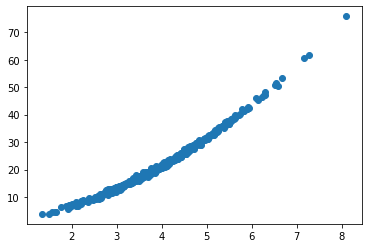

In [118]:
import matplotlib.pyplot as plt
plt.scatter(BB[:, 0], BB[:,1])

In [124]:
p1 = np.zeros((index))
for i in range(index):
    p1[i] = p[index - i-1]
poli = np.poly1d(p1)

In [125]:
poli

poly1d([   0.72433141,  -10.25217573,   52.77857816, -109.74952899,
         85.63142294])

In [126]:
print(np.poly1d(poli))

        4         3         2
0.7243 x - 10.25 x + 52.78 x - 109.7 x + 85.63


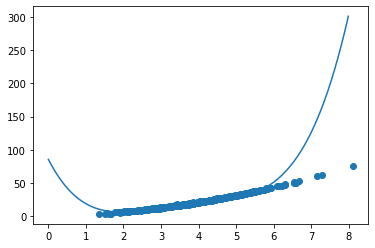

In [129]:
# Data for plotting
t = np.arange(0.0, 8.0, 0.01)
s = poli(t)

plt.plot(t, s)
plt.scatter(BB[:, 0], BB[:,1])

Maybe we could have stopped even before, looks like the fitted polynomial has highier complexity or order than the real data. 

In [1]:
for i in range(index):
    ind = index - i
    A = np.zeros((ind, ind))
    A = B[:ind, :ind]
    y = BB[:ind, 1]
    p = np.linalg.solve(A, y)
    p1 = np.zeros((index))
    for i in range(index):
        p1[i] = p[index - i-1]
    poli = np.poly1d(p1)
    # Data for plotting
    t = np.arange(0.0, 8.0, 0.01)
    s = poli(t)

    plt.plot(t, s)
    plt.scatter(BB[:, 0], BB[:,1])

NameError: name 'index' is not defined